In [1]:
import sys
sys.path.append('../')

from cube import Cube
from mcts_steps_taken import MCTS
from astar import Astar
from bfs import BFS

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

plt.rcParams['figure.figsize'] = [15, 8]

In [3]:
max_scramble_depth = 5
num_per_scramble_depth = 30
num_iterations_per_solve = 200_000

# MCTS or Astar
algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
# algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')
# algorithm = BFS(num_iter = num_iterations_per_solve)

In [4]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

100%|██████████| 30/30 [00:00<00:00, 157.01it/s]


Attempts:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Mean:  3.0
Std:  0.0


100%|██████████| 30/30 [00:00<00:00, 80.83it/s] 


Attempts:  [7, 5, 5, 5, 5, 7, 4, 5, 3, 23, 5, 4, 46, 5, 12, 3, 5, 5, 6, 5, 5, 5, 3, 3, 69, 5, 4, 17, 4, 7]
Mean:  9.566666666666666
Std:  13.785701126731116


100%|██████████| 30/30 [00:02<00:00, 11.00it/s]


Attempts:  [7, 58, 12, 22, 9, 14, 18, 350, 114, 5, 7, 6, 52, 7, 14, 36, 247, 6, 9, 11, 276, 7, 9, 7, 8, 625, 8, 28, 51, 9]
Mean:  67.73333333333333
Std:  133.99998341625104


100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


Attempts:  [413, 90, 3, 20, 339, 118, 163, 232, 52, 14, 4, 20, 85, 780, 232, 364, 120, 257, 45, 98, 14, 85, 9, 17, 1779, 84, 185, 262, 260, 20]
Mean:  205.46666666666667
Std:  335.1475031816422


100%|██████████| 30/30 [08:01<00:00, 16.04s/it]

Attempts:  [301, 1852, 256, 471, 240, 11160, 17585, 3565, 7377, 989, 37354, 2928, 3671, 229, 1700, 4359, 245, 1340, 5513, 230, 278, 1212, 10948, 177690, 7991, 1017, 1349, 6, 59119, 5600]
Mean:  12219.166666666666
Std:  33058.73203767636


Total attempts: [30, 30, 30, 30, 30]


<ErrorbarContainer object of 3 artists>

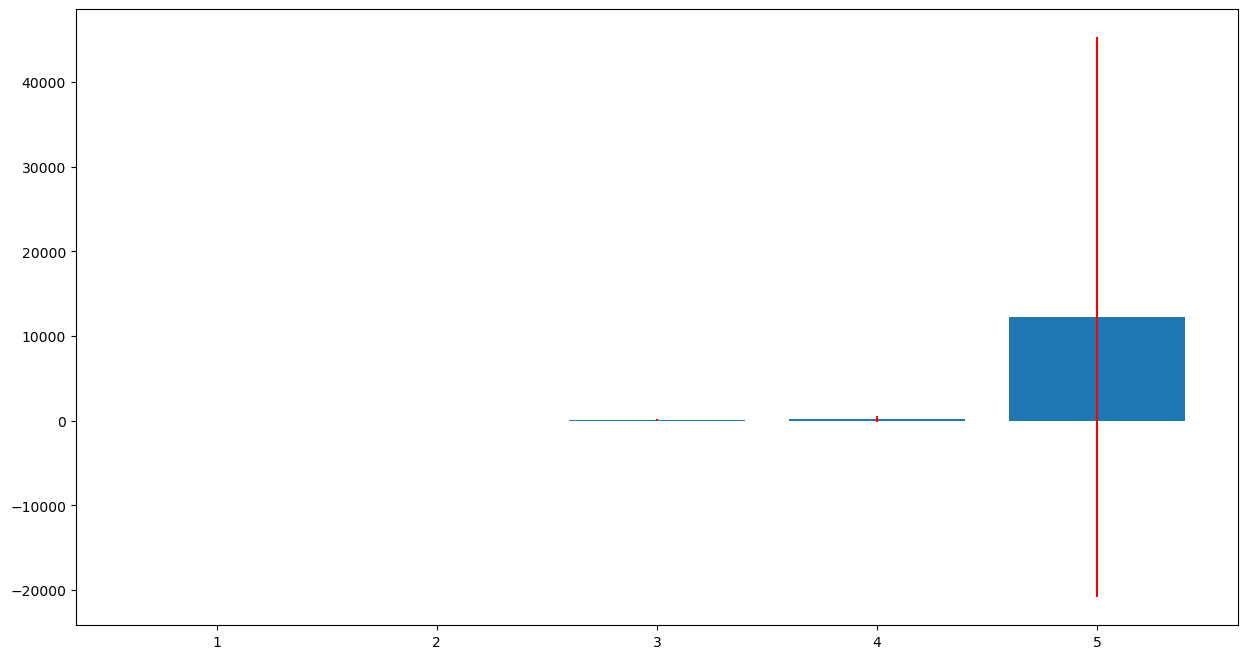

In [5]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts)
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red')